## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master $ ```


## Problem 2: Create a function which adds two numbers

Create a function add_numbers which adds two numbers. Demonstrate in a seperate cell that your function works.

In [11]:
def add_numbers(a,b):
    c = a + b;
    return c
add_numbers (2,3)

# Use: print add_numbers(2,3) should return 5.

5

In [13]:
add_numbers(34,909)

943

## Problem 3: Load in sales data using Pandas Library 

In [7]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [68]:
import pandas as pd
import pylab
from sklearn.linear_model import LinearRegression
import numpy.random
import random
import json
pd.set_option('display.max_columns',500)
%matplotlib inline
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 3, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

G:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x19a95692c50>,
 'caps': [<matplotlib.lines.Line2D at 0x19a9569e7b8>,
 'fliers': [<matplotlib.lines.Line2D at 0x19a956a7a58>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x19a956a7208>,
 'whiskers': [<matplotlib.lines.Line2D at 0x19a95692f28>,
  <matplotlib.lines.Line2D at 0x19a963bafd0>]}

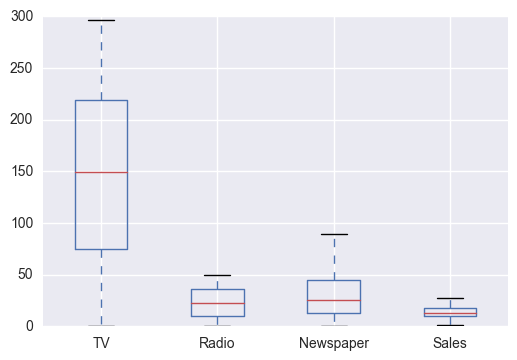

In [69]:
df.boxplot()

### Problem 3, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

In [26]:
#plt.scatter(Fill_this_in)

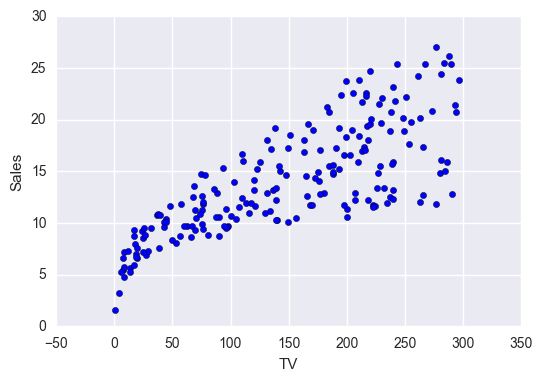

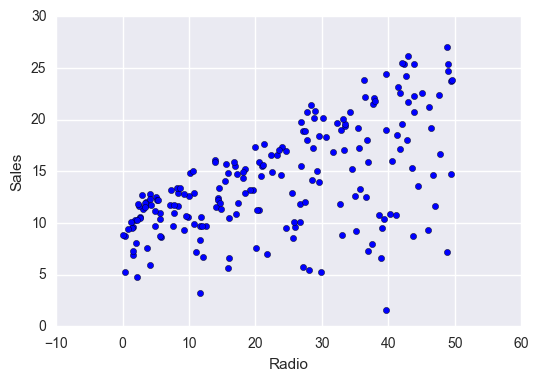

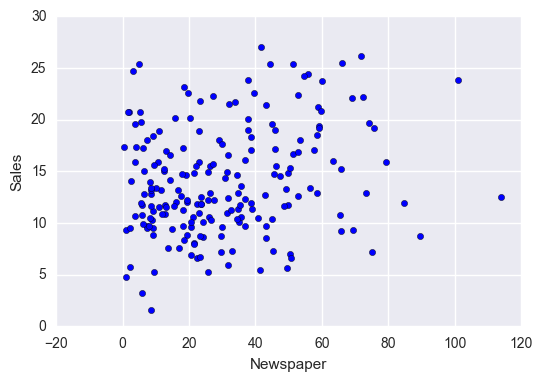

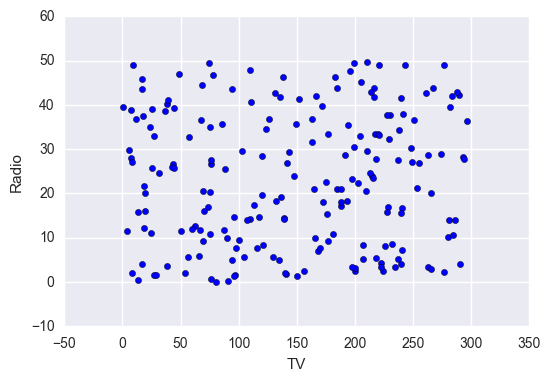

In [73]:
from pandas.tools.plotting import scatter_matrix

plt.figure(1)
plt.scatter(df.loc[:,'TV'],df.loc[:,'Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')

plt.figure(2)
plt.scatter(df.loc[:,'Radio'],df.loc[:,'Sales'])
plt.xlabel('Radio')
plt.ylabel('Sales')

plt.figure(3)
plt.scatter(df.loc[:,'Newspaper'],df.loc[:,'Sales'])
plt.xlabel('Newspaper')
plt.ylabel('Sales')

plt.figure(4)
plt.scatter(df.loc[:,'TV'],df.loc[:,'Radio'])
plt.xlabel('TV')
plt.ylabel('Radio')

Which of the variables seem correlated with one another? Which don't? Explain your answer

### Probelm 3, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [50]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
#from sklearn.preprocessing import StandardScale
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#from mpl_toolkits.basemap import Basemap
import re
import pylab as plt
import seaborn
import numpy.random as nprnd
import random
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

# Set y to be the sales in df
y = df['Sales']

# Set X to be just the features described above in df.
x = df

# Split data into training and testing here
x_train = x[0:int(200*0.8)]
x_test = x[int(200*0.8):]
y_train = y[0:int(200*0.8)]
y_test = y[int(200*0.8):]

# Train Model using LinearRegressioon's .fit()
regr = LinearRegression()
regr.fit(x_train, y_train)

# Make predictions on Test set using .predict()

# Evaluate perforamnce using R^2 and RMSE

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(x_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))

Coefficients: 
 [  1.31524176e-17   3.43819477e-17   1.42201594e-16   1.00000000e+00]
Residual sum of squares: 0.00
Variance score: 1.00


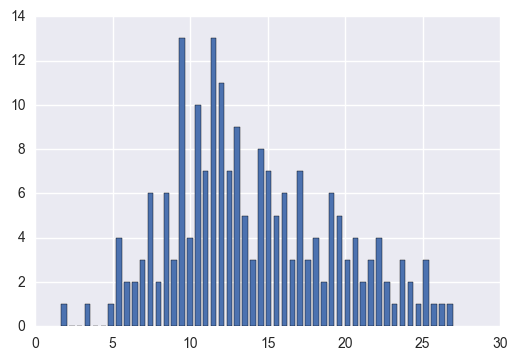

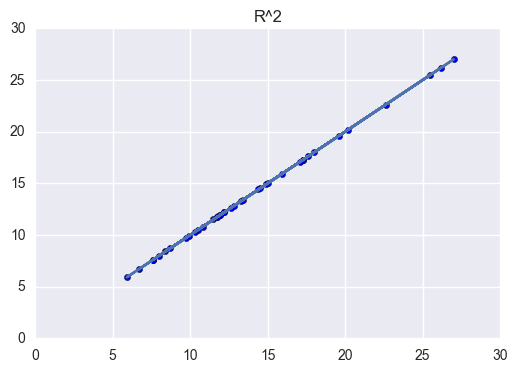

In [74]:
hist, bins = np.histogram(df['Sales'], bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

plt.figure
#plt.figure(figsize=(10,10))
plt.title('R^2')
plt.scatter(regr.predict(x_test),y_test)
plt.plot(y_test,y_test)

### Bonus: How could you have improved performance?

## Problem 4:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Running...


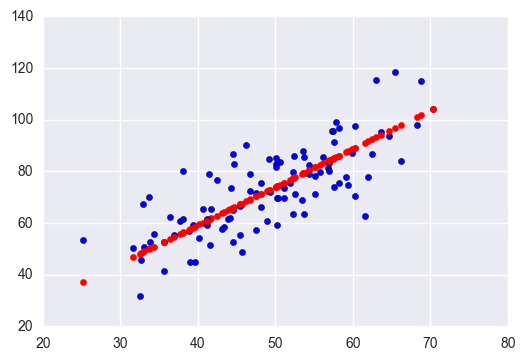

In [70]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations):
    points = genfromtxt("data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    #print ("Starting gradient descent at b = {0}, m = {1}, error = {2}").format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    #print ("After {0} iterations b = {1}, m = {2}, error = {3}").format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

Running...


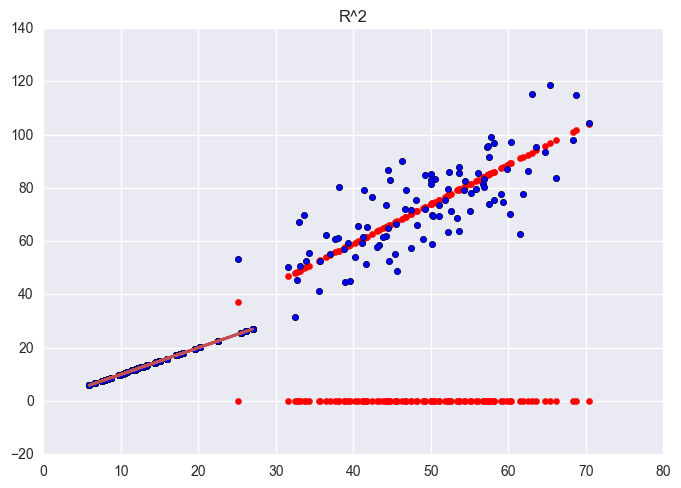

Running...


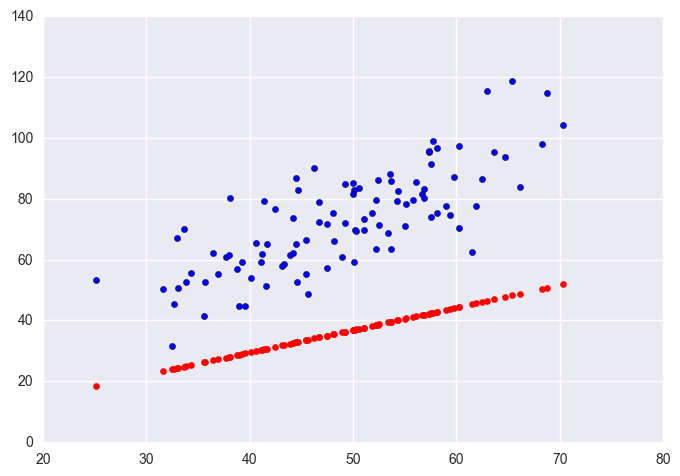

Running...


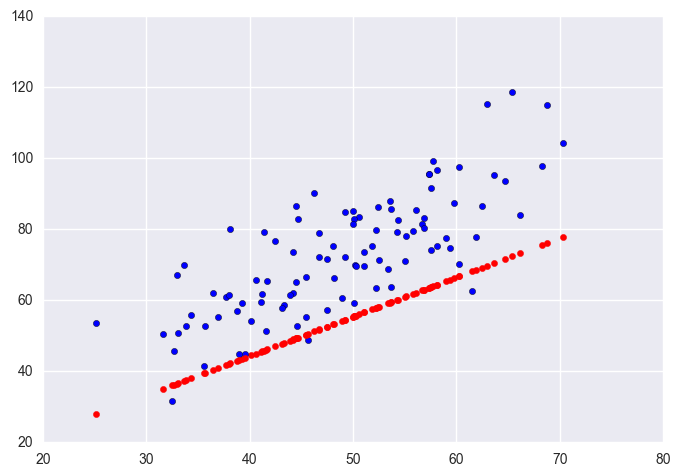

Running...


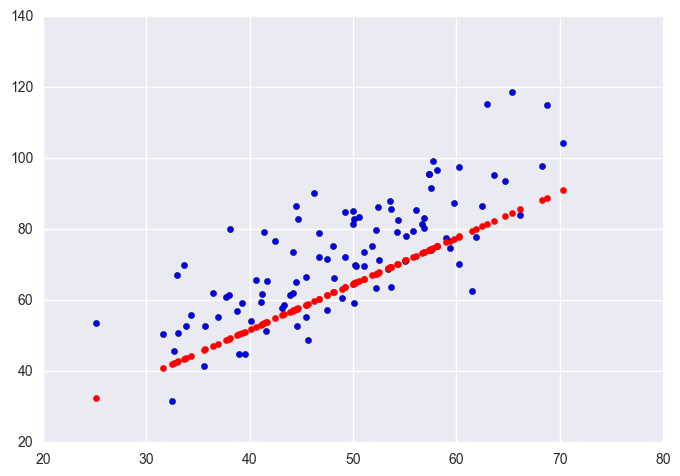

Running...


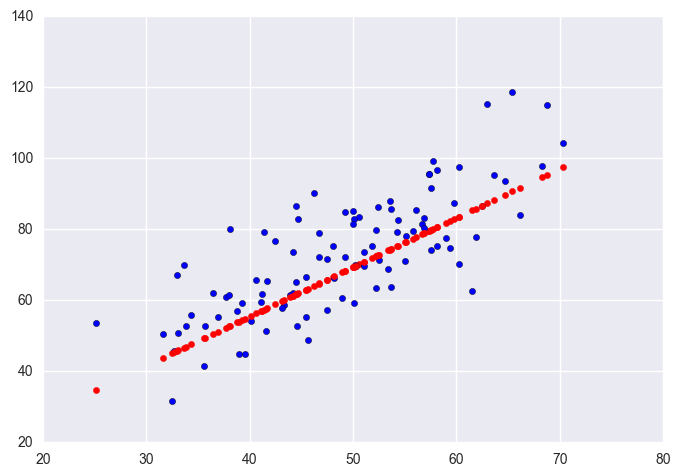

Running...


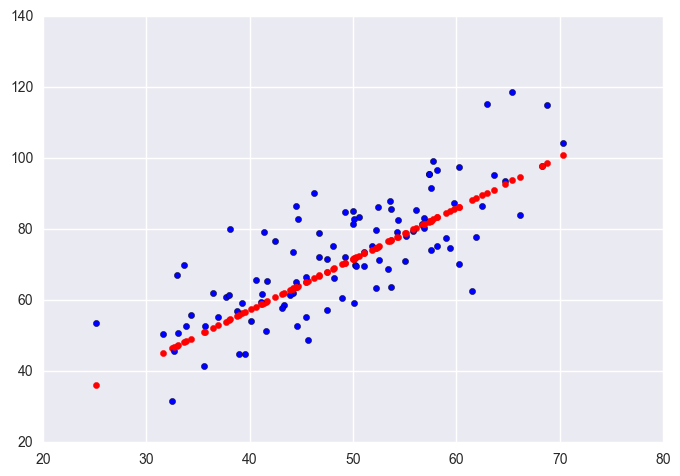

Running...


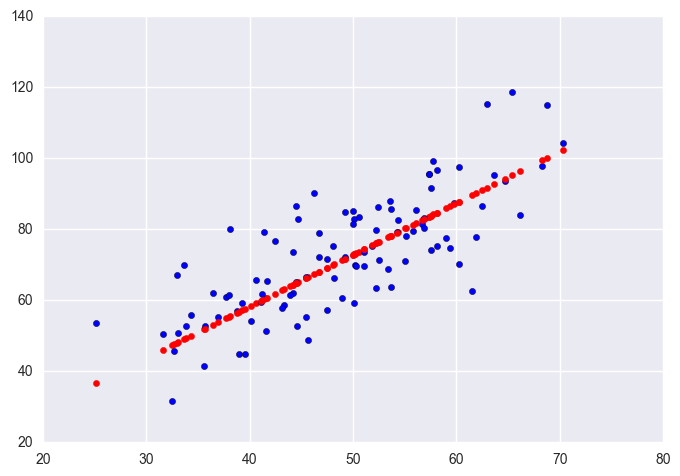

Running...


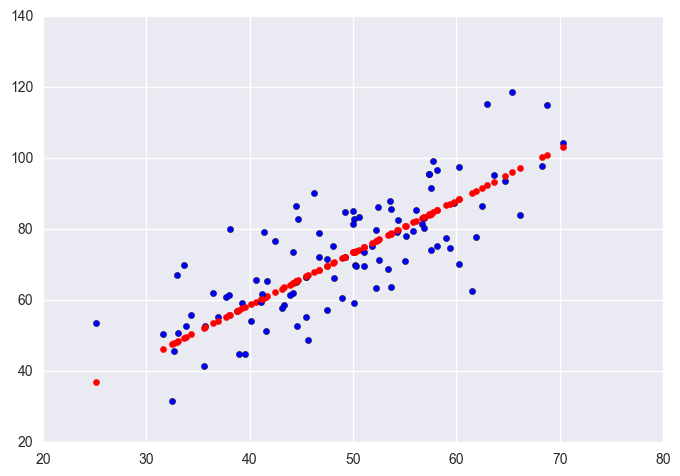

Running...


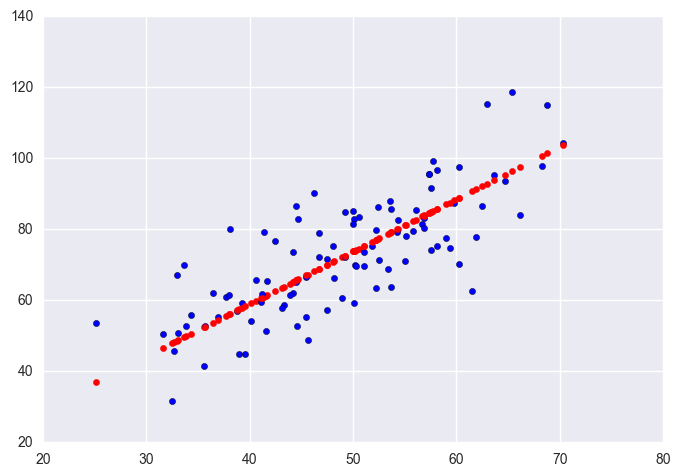

Running...


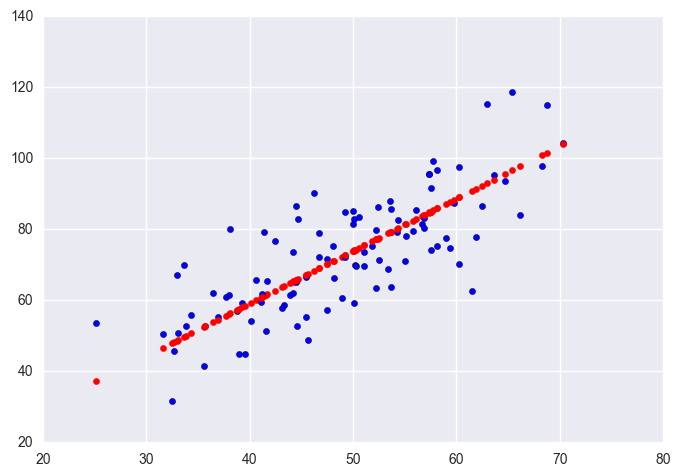

In [61]:
# Use this to visually discuss convergence rate based on learning rate

#for num in range(0,10):
#    run(num)
#    plt.show()

for num in range(0,10):
    run(num)
    plt.show()

In [76]:
the_count = [1, 2, 3, 4, 5]
fruits = ['apples', 'oranges', 'pears', 'apricots']
change = [1, 'pennies', 2, 'dimes', 3, 'quarters']

# this first kind of for-loop goes through a list
for number in the_count:
    print ("This is count %d" % number)

This is count 1
This is count 2
This is count 3
This is count 4
This is count 5
